<a href="https://colab.research.google.com/github/Naima-Ashfaq12/DataScience/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import io

# Upload cleaned dataset
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(io.BytesIO(uploaded['cleaned_student_dataset.csv']))

# Display first few rows
df.head()


Saving cleaned_student_dataset.csv to cleaned_student_dataset.csv


,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,Paul,Casey,male,False,3,False,27,lawyer,73,81,93,97,63,80,87
1,Danielle,Sandoval,female,False,2,False,47,doctor,90,86,96,100,90,88,90
2,Tina,Andrews,female,False,9,True,13,government officer,81,97,95,96,65,77,94
3,Tara,Clark,female,False,5,False,3,artist,71,74,88,80,89,63,86
4,Anthony,Campos,male,False,5,False,10,unknown,84,77,65,65,80,74,76


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   first_name                  2000 non-null   object
 1   last_name                   2000 non-null   object
 2   gender                      2000 non-null   object
 3   part_time_job               2000 non-null   bool  
 4   absence_days                2000 non-null   int64 
 5   extracurricular_activities  2000 non-null   bool  
 6   weekly_self_study_hours     2000 non-null   int64 
 7   career_aspiration           2000 non-null   object
 8   math_score                  2000 non-null   int64 
 9   history_score               2000 non-null   int64 
 10  physics_score               2000 non-null   int64 
 11  chemistry_score             2000 non-null   int64 
 12  biology_score               2000 non-null   int64 
 13  english_score               2000 non-null   int6

,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [3]:
df = df.dropna()


In [4]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()


,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,3,27,73,81,93,97,63,80,87
1,2,47,90,86,96,100,90,88,90
2,9,13,81,97,95,96,65,77,94
3,5,3,71,74,88,80,89,63,86
4,5,10,84,77,65,65,80,74,76


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

numeric_df["Cluster"] = cluster_labels
numeric_df.head()


,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,Cluster
0,3,27,73,81,93,97,63,80,87,1
1,2,47,90,86,96,100,90,88,90,1
2,9,13,81,97,95,96,65,77,94,1
3,5,3,71,74,88,80,89,63,86,0
4,5,10,84,77,65,65,80,74,76,0


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

numeric_df["PCA1"] = pca_result[:, 0]
numeric_df["PCA2"] = pca_result[:, 1]


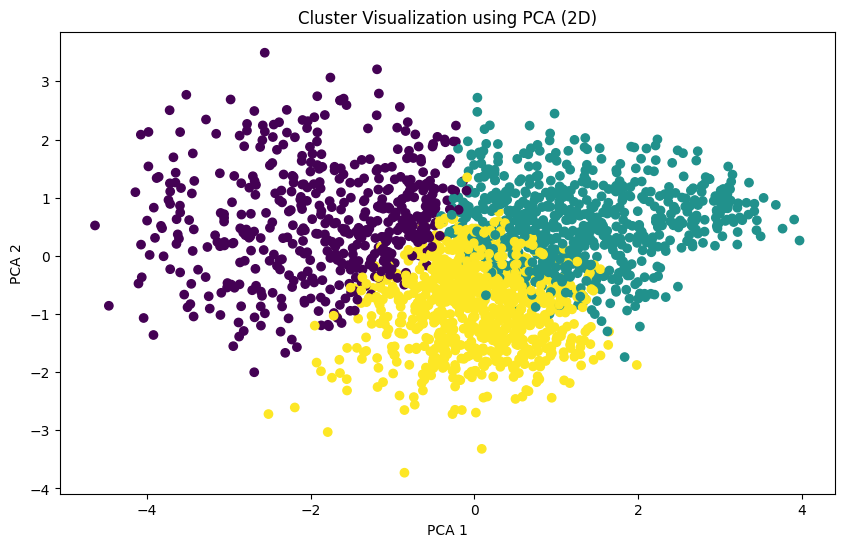

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(
    numeric_df["PCA1"],
    numeric_df["PCA2"],
    c=numeric_df["Cluster"]
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Cluster Visualization using PCA (2D)")
plt.show()
